In [1]:
import scanpy as sc
import scvi
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


/home/formanj/scRNAseq_model/UpDownProject/.venv/lib/python3.10/site-packages/scvi/_settings.py:63: UserWarning: Since v1.0.0, scvi-tools no longer uses a random seed by default. Run `scvi.settings.seed = 0` to reproduce results from previous versions.
  self.seed = seed
/home/formanj/scRNAseq_model/UpDownProject/.venv/lib/python3.10/site-packages/scvi/_settings.py:70: UserWarning: Setting `dl_pin_memory_gpu_training` is deprecated in v1.0 and will be removed in v1.1. Please pass in `pin_memory` to the data loaders instead.
  self.dl_pin_memory_gpu_training = (
/home/formanj/scRNAseq_model/UpDownProject/.venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Preprocessing

Import Data

In [6]:
rawPath = os.path.join(os.path.dirname(os.getcwd()), "Datasets", "DUSP1", "A1-2_sc_Bulk_GSE141834", 'GSE141834_scRNAseq_rawCounts.txt')
adata = sc.read_text(rawPath).T
adata.write_h5ad("GSE141834_scRNAseq_rawCounts.h5ad")


Mandatory genes

In [4]:
data = '''
ABCB1
ABCB1
ABCB11
ABCB4
ABCC2
ABCC2
ABCC2
ABCC3
ABCC3
ABCC3
ABCC4
ABCC4
ABCC5
ABCG5
ABCG8
ABHD2
ACAA1
ACADM
ACOX1
ADH7
AGER
AHR
AHR
AHR
AHR
AHRR
AIP
AIP
AKAP13
ALAS1
ALDH3A1
ALDH3A1
ALOX5AP
AMIGO2
ANGPTL4
ANKRD1
APOA1
APOA2
APOA5
APOC3
ARE
ARL5B
ARNT
ARNT
ARNT
AhR Ligand
AhR target genes
Antioxidant proteins
B3GNT5
BAAT
BAX 
BHLHE40
BIRC2
BIRC3
BLVRB
Bile acid detoxification
Bile acid neosynthesis
Bile acid & xenobiotics transport
CAP2
CAR target genes
CAR/PXR Ligand
CBR1
CBR3
CCL2
CCL20
CCND1
CDC37
CDC37
CDC42EP3
CDK1
CDK4
CDKN1B
CDKN1C
CES1
CES2
CES3
CES3
CES4A
CES5A
CPEB4
CPT1A
CPT2
CUL1
CXCR7
CYP1A1
CYP1A1
CYP1A2
CYP1A2
CYP1B1
CYP1B1
CYP2A6
CYP2A6
CYP2A6
CYP2B6
CYP2B6
CYP2B6
CYP2B6
CYP2C19
CYP2C19
CYP2C9
CYP2C9
CYP2C9
CYP3A4
CYP3A4
CYP3A4
CYP3A4
CYP3A4
CYP3A5
CYP3A5
CYP3A7
CYP4A11
CYP4A11
CYP4A11
CYP4F12
CYP7A1
CYP7A1
CYP7A1
CYP7A1
CYP8B1
CYP8B1
Cell proliferation and apoptosis
Cell proliferation and differentiation
Cholesterol catabolism
Co-activators
Co-activators 
Co-activators 
Coregulators
Coregulators
Coregulators
Coregulators
DBI
DNAJB1
DNAJC15
DNAJC7
DNAJC7
DNAJC7
DNER
Drug and steroid metabolism
Drug and steroid metabolism
Drug and steroid metabolism
Drug and steroid metabolism
Drug and steroid metabolism
Drug and steroid metabolism
EDN2
EGFR
EGFR pathway
EGR1
EHHADH
EHHADH
ENC1
EP300
EP300
EPB41L4B
EPHA2
EPHA3
ER ligand
ER target genes
ERE
ESR1
ESR1
ESR1
ESR1
ESR1
ESR1
ESR1
ESR1
ETNK2
FABP1
FASN
FGD4
FGF13
FGF19
FGFBP1
FKBP5
FOXO1
FOXO1
FTH1
FTL
FXR Target genes
FXR ligand
FXRE 
G6PD
GADD45B
GCC1
GCLC
GCLM
GGT1
GPAM
GPR115
GPR153
GPX2
GPX3
GR inhibitory target genes
GR ligand
GR stimulatory target genes
GRE
GSR
GSTA1
GSTA2
GSTA2
GSTA2
GSTA2
GSTA3
GSTA4
GSTA5
GSTM1
GSTM2
GSTM3
GSTM4
GSTM5
GSTP1
GSTT1
GSTT2
Genes
Genes
Genes
Genes
Genes
Genes
Genes
Genes
Genes
Genes
Genes
Growth and apoptosis
Growth and apoptosis
Growth factors and receptors
HBEGF
HES1
HGF
HMOX1
HSP90AA1
HSP90AA1
HSP90AA1
HSP90AA1
HSP90AA1
HSP90AA1
HSP90AA1
HSP90AA1 
HSP90AB1
HSPA1A
Hepatocyte proliferation
IFNG
IGFBP1  
IL11
IL12A
IL12B
IL17B
IL1B
IL2  
IP6K3
IRS2
Inflammation
Inflammation
Inflammation
JUN
JUN
JUN
JUNB
JUND
KAT2B
KEAP1
KEAP1
KLK15
KTN1
LRRC8A
LXR ligand
LXR target genes
LXRE
Ligand
Ligand
Ligand
Ligand
Ligand
Ligand
Ligand
Ligand
Ligand
Ligand
Ligand
Ligand
Ligand
Ligand
Ligand
Ligand
Ligand
Ligand
Ligand
Ligand
Ligand
Ligand
Ligand
Ligand
Ligand
Ligand
Ligand
Ligand
Ligand
Ligand
Ligand
MAFF
MAFG
ME1
MFGE8
MGAM
MGST1
MGST2
MGST3
MT1IP
MYC
MYOF
Metabolism
Metabolism
Multi-drug resistance
Multi-drug resistance
Multi-drug resistance
NAV3
NCOA1
NCOA1
NCOA1
NCOA2
NCOA2
NCOA3
NCOA6
NFE2L2
NFE2L2
NFE2L2
NFE2L2
NFE2L2
NFE2L2
NFKB2
NQO1
NQO1
NR0B2
NR0B2
NR0B2
NR1H3
NR1H3
NR1H3
NR1H3
NR1H3
NR1H4
NR1H4
NR1H4
NR1H4
NR1I2
NR1I2
NR1I2
NR1I2
NR1I2
NR1I3
NR1I3
NR1I3
NR1I3
NR1I3
NR3C1
NR3C1
NR3C1
NR3C1
NR3C1
NR3C1
NR3C1
NR3C1
NR3C1
NR3C1
NRF2 ligand
NRF2 target genes
NRG1
NRIP1
Nuclear receptors
Other
Other
Other
Other
Other
Other
Other
Other
Other
Other
PBREM
PCK1
PDE4B
PDGFB
PDK4
PGD
PLK2
PLTP
PMP2
POLK
POU5F1
PPAR alpha target genes
PPAR alpha ligand
PPARA
PPARA
PPARA
PPARA
PPARD
PPARGC1A
PPARGC1A
PPARGC1A
PPP1R14C
PPP2R4
PPRE 
PRDX1
PRDX6
PRRG4
PSMC5
PTGES3
PTGES3
PTGR1
PTGS2
PXR target genes
Phase 1 proteins 
Phase 2 metabolism
Phase 2 metabolism
Phase 2 metabolism
Phase 2 metabolism
Phase 2 proteins 
RGS2
RXRA
RXRA
RXRA
RXRA
RXRA
RXRA
RXRA
RXRA
RXRA
RXRA
RXRA
RXRA
RXRA
S100P
SCD
SCNN1A
SCP2
SDPR
SEC14L1
SERPINA1
SERPINB2
SERPINB9
SERTAD2
SLC10A1
SLC19A2
SLC26A2
SLC27A1
SLC27A5
SLC2A1
SLC2A10
SLC2A11
SLC2A12
SLC2A13
SLC2A14
SLC2A2
SLC2A3
SLC2A4
SLC2A5
SLC2A6
SLC2A7
SLC2A8
SLC2A9
SLC39A1
SLC39A10
SLC39A11
SLC39A12
SLC39A13
SLC39A14
SLC39A2
SLC39A3
SLC39A4
SLC39A5
SLC39A6
SLC39A7
SLC39A8
SLC39A9
SLC5A1
SLC5A10
SLC5A11
SLC5A12
SLC5A2
SLC5A3
SLC5A4
SLC5A5
SLC5A6
SLC5A7
SLC5A8
SLC5A9
SLC6A1
SLC6A11
SLC6A13
SLC6A14
SLC6A15
SLC6A16
SLC6A17
SLC6A18
SLC6A19
SLC6A2
SLC6A20
SLC6A3
SLC6A4
SLC6A5
SLC6A6
SLC6A7
SLC6A8
SLC6A9
SLC7A11
SLC7A5
SLCO1B1
SLCO2B1
SMARCA1
SMC1A
SNAI2
SOD3
SP1
SP1
SPINK13
SPRY1
SQSTM1
SRC
SRC
SRC 
SRC  
SREBF1
SRGN
SRPX2
SRXN1
STAT3
STOM
SULT1A1
SULT2A1
SULT2A1
SULT2A1
SULT2A1
Signal transduction
Signal transduction
TATA box
TATA box
TATA box
TATA box
TATA box
TATA box
TATA box
TATA box
TATA box
TATA box
TATA box
TATA box
TGFA
TGFB1
TGFB1
TGFB2
TGFBR2
TGFBR3
THBD
TNF  
TNFAIP3
TNS4
TSC22D3
TXN
TXNRD1
TXNRD3
Transcription factors
Transcription factors
Transcription factors
Transcription factors
Transport
Transport
UGT1A1
UGT1A1
UGT1A1
UGT1A1
UGT1A3
UGT1A3
UGT1A3
UGT1A3
UGT1A4
UGT1A4
UGT1A4
UGT1A4
UGT1A6
UGT1A6
UGT1A6
UGT1A6
UGT1A7
UGT1A7
UGT1A9
UGT1A9
UGT1A9
UGT1A9
UGT1A9
UGT2B4
UGT2B7
Unknown
VDR
VDR
VDR
VDR ligand
VDR target genes
VDRE
XRE
XRE 
ZIC2
bile acid conjugation
fatty acid transport
lipoprotein metabolism
mitochondrial beta-oxidation
mitochondrial omega-oxidation
nGRE
p23
p23
p23
peroxisomal beta-oxidation
'''

lines = data.strip().split('\n')
lines = set(lines)
lines = list(lines)







In [5]:
lines = [line for line in lines if len(line.split()) <= 1]
lines = [line.replace(' ', '') for line in lines]
print(lines)

['SLC6A3', 'HES1', 'FKBP5', 'CDC37', 'PPRE', 'TXNRD3', 'CYP2C19', 'CES1', 'ENC1', 'SLC6A8', 'IL17B', 'KLK15', 'TNF', 'HSP90AA1', 'CYP2A6', 'VDRE', 'PLK2', 'CYP7A1', 'GSTA3', 'SRC', 'SLC5A3', 'EPHA2', 'p23', 'BAAT', 'FOXO1', 'TGFBR2', 'SLC7A11', 'PRRG4', 'MAFF', 'SMARCA1', 'SLC2A8', 'SLCO2B1', 'SLC27A5', 'PPARA', 'nGRE', 'Transport', 'UGT1A4', 'SERPINB9', 'STOM', 'PPP2R4', 'ABCB4', 'SLC5A1', 'SLC2A14', 'CYP1B1', 'SLC39A9', 'PDGFB', 'SLC39A8', 'PPARGC1A', 'SLC19A2', 'PRDX1', 'SEC14L1', 'LRRC8A', 'NR0B2', 'GSTM5', 'GSTM1', 'SLC6A14', 'TGFB1', 'HMOX1', 'Other', 'DNER', 'SREBF1', 'ABHD2', 'LXRE', 'CYP1A1', 'GSTM2', 'SLC39A7', 'CAP2', 'GGT1', 'CCL20', 'GSR', 'PRDX6', 'NRIP1', 'Genes', 'GSTM3', 'SLC6A11', 'NQO1', 'UGT1A3', 'ABCB1', 'CYP4F12', 'APOC3', 'SLC39A11', 'SERTAD2', 'SLC39A13', 'FABP1', 'TXN', 'UGT1A6', 'DNAJB1', 'KAT2B', 'ERE', 'XRE', 'BLVRB', 'PTGES3', 'FGFBP1', 'FGF19', 'JUNB', 'SLC27A1', 'ARE', 'SLC2A10', 'EGFR', 'MT1IP', 'PMP2', 'Unknown', 'G6PD', 'S100P', 'NR3C1', 'CES5A', 'GSTT

In [ ]:
mandatoryGenes = [gene for gene in adata.var_names if gene in lines]


Quality Control

In [3]:
sc.pp.filter_genes(adata, min_cells = 10)
sc.pp.filter_cells(adata, min_genes = 100)

In [4]:
adata.var['mt'] = adata.var.index.str.startswith('MT-')
ribo_url = "http://software.broadinstitute.org/gsea/msigdb/download_geneset.jsp?geneSetName=KEGG_RIBOSOME&fileType=txt"
ribo_genes = pd.read_table(ribo_url, skiprows=2, header = None)
adata.var['ribo'] = adata.var_names.isin(ribo_genes[0].values)
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt', 'ribo'], percent_top=None, log1p=False, inplace=True)

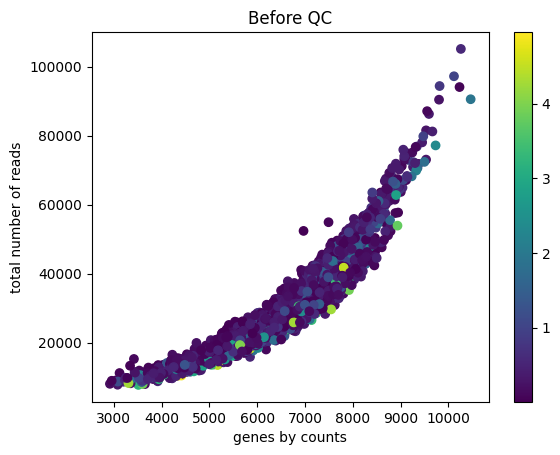

In [5]:
plt.scatter(adata.obs['n_genes_by_counts'], adata.obs['total_counts'], c=adata.obs['pct_counts_mt'])
plt.xlabel('genes by counts')
plt.ylabel('total number of reads')
plt.title("Before QC")
plt.colorbar()
plt.show()

In [6]:
adata.layers['counts'] = adata.X

Normalization

In [7]:
sc.pp.normalize_total(adata, target_sum = 1e4)
sc.pp.log1p(adata)
adata.raw = adata

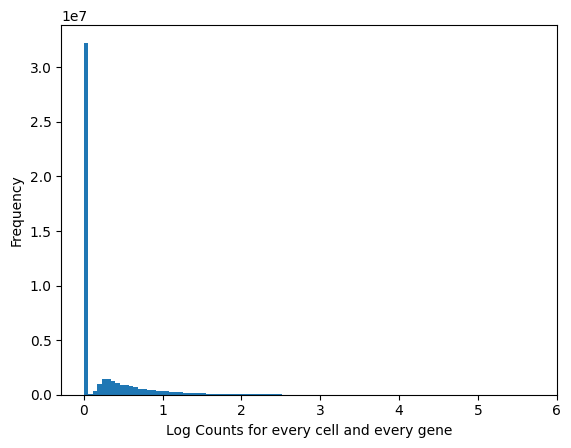

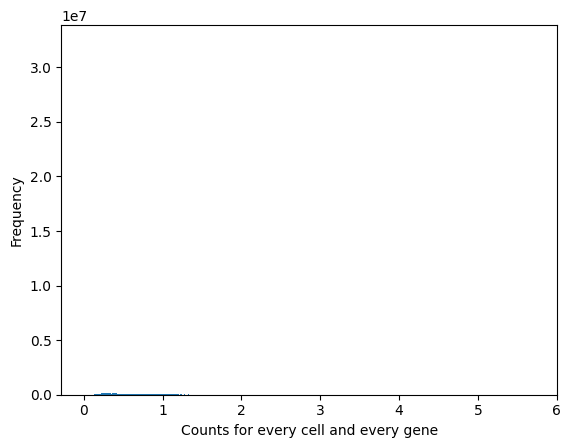

array([4949.431 , 3959.8042, 3647.6094, ..., 4448.373 , 4188.9893,
       4756.816 ], dtype=float32)

In [8]:
plt.hist(adata.X.flatten(), bins=100)
plt.xlabel('Log Counts for every cell and every gene')
plt.ylabel('Frequency')
plt.show()
plt.hist(adata.layers['counts'].flatten(), bins=1000)
plt.xlabel('Counts for every cell and every gene')
plt.ylabel('Frequency')
'''plt.xlim(10, 200)
plt.ylim(0, 10000)'''
plt.show()

adata.layers['counts'].sum(axis = 1)

In [9]:
adata.obs['Timepoint'] = [x.split('.')[1] for x in adata.obs_names]
adata.obs['Treatment'] = [x.split('.')[0] for x in adata.obs_names]

adata.obs['Timepoint'] = adata.obs['Timepoint']
adata.obs['Treatment'] = adata.obs['Treatment']

Check var names

In [10]:
lsChecks = [
    'day', 'DUSP1', 'hashtag', 'timepoint', 'treatment', 'treatment_timepoint', 'treatment_timepoint_day', 'treatment_day', 'treatment_timepoint_day',
    'treatment_timepoint', 'treatment_timepoint_day', 'treatment_day', 'treatment_timepoint_day', 'treatment_timepoint', 'treatment_timepoint_day', 'hash',
    'tag' 

]

new_tags = ['experiment_id', 'sample_id', 'batch', 'cell_type', 
            'condition', 'replicate', 'protocol', 'operator', 'date', 
            'location', 'species', 'strain', 'sex', 'age', 'developmental_stage', 
            'tissue', 'organ', 'cell_line', 'disease_state', 'platform', 'sequencing_depth', 
            'read_length', 'library_type', 'experiment_type', 'analysis_software', 'sample', 'type', 'name', 'id', 'group',
            'experiment', 'cell', adata.var_names[483]]

lsChecks.extend(new_tags)

new_tags = ['genotype', 'phenotype', 'molecule', 'barcode', 'cell_cycle', 'population', 
            'cluster', 'subpopulation', 'marker', 'antibody', 'probe', 'primer', 'temperature', 
            'humidity', 'pressure', 'light_cycle', 'food_source', 'lifecycle_stage', 'growth_conditions', 
            'experiment_conditions', 'lab', 'researcher', 'project', 'publication', 'cycle', 'dex', adata.var_names[1849], 'GH', 'dusp']


lsChecks.extend(new_tags)
print(len(lsChecks))
for i in lsChecks:
    for name in adata.var_names:
        if i.lower() in name.lower():
            print(f'{i} is in the var_names, {name}')




79
DUSP1 is in the var_names, DUSP13
DUSP1 is in the var_names, DUSP1
DUSP1 is in the var_names, DUSP18
DUSP1 is in the var_names, DUSP11
DUSP1 is in the var_names, DUSP12
DUSP1 is in the var_names, DUSP14
DUSP1 is in the var_names, DUSP16
DUSP1 is in the var_names, DUSP19
DUSP1 is in the var_names, DUSP10
DUSP1 is in the var_names, DUSP15
tag is in the var_names, STAG3L3
tag is in the var_names, STAG1
tag is in the var_names, TAGLN2
tag is in the var_names, STAG3L5P
tag is in the var_names, STAG3L5P-PVRIG2P-PILRB
tag is in the var_names, STAG2
tag is in the var_names, CTAGE5
tag is in the var_names, STAG3
tag is in the var_names, STAG3L4
tag is in the var_names, TAGLN
tag is in the var_names, STAG3L2
age is in the var_names, MAGEH1
age is in the var_names, XAGE1A
age is in the var_names, LAGE3
age is in the var_names, MAGEA1
age is in the var_names, LAGE3P1
age is in the var_names, GAGE1
age is in the var_names, BAGE2
age is in the var_names, MAGEA12
age is in the var_names, XAGE2
age

Select highly variable genes

/home/formanj/scRNAseq_model/UpDownProject/.venv/lib/python3.10/site-packages/scanpy/preprocessing/_highly_variable_genes.py:220: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  disp_grouped = df.groupby('mean_bin')['dispersions']


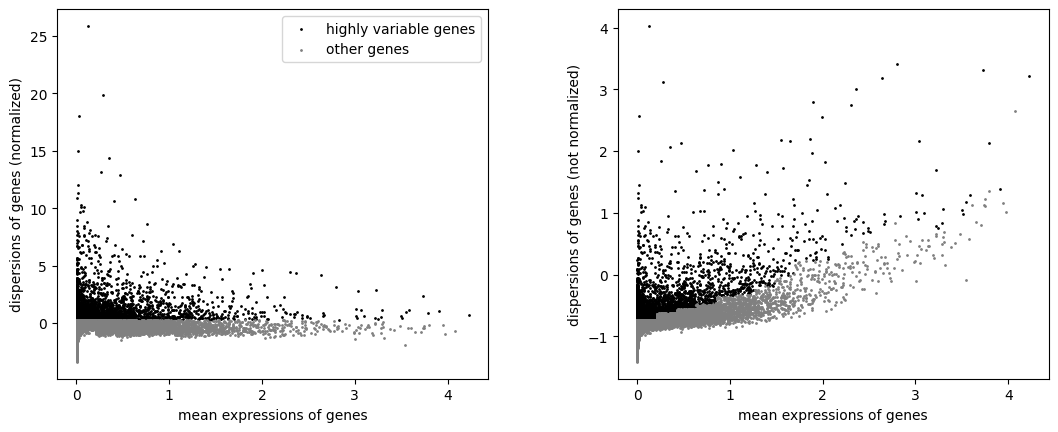

In [11]:
sc.pp.highly_variable_genes(adata, n_top_genes = 5000)
sc.pl.highly_variable_genes(adata)

In [12]:
adata = adata[:, adata.var.highly_variable]

In [13]:
sc.pp.regress_out(adata, ['total_counts', 'pct_counts_mt', 'pct_counts_ribo'])
# IDK if this step is necessary with scVI

/home/formanj/scRNAseq_model/UpDownProject/.venv/lib/python3.10/site-packages/anndata/_core/anndata.py:1301: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/home/formanj/scRNAseq_model/UpDownProject/.venv/lib/python3.10/site-packages/anndata/_core/anndata.py:1301: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c


Lower Dimensional Representation

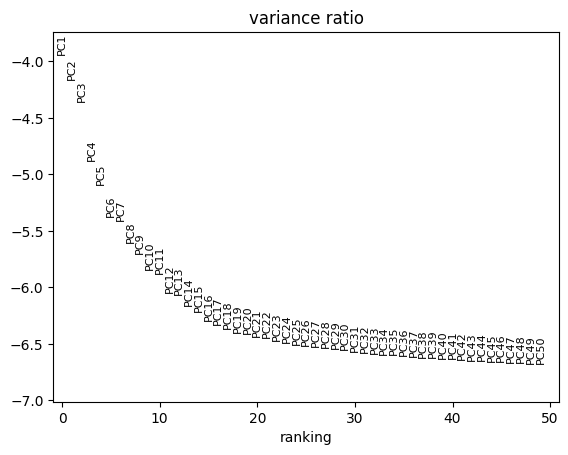

In [14]:
sc.pp.scale(adata, max_value=10)
sc.tl.pca(adata, svd_solver='arpack')
sc.pl.pca_variance_ratio(adata, log=True, n_pcs = 50)

Pre-scVI latent space

/home/formanj/scRNAseq_model/UpDownProject/.venv/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/formanj/scRNAseq_model/UpDownProject/.venv/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/formanj/scRNAseq_model/UpDownProject/.venv/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warn

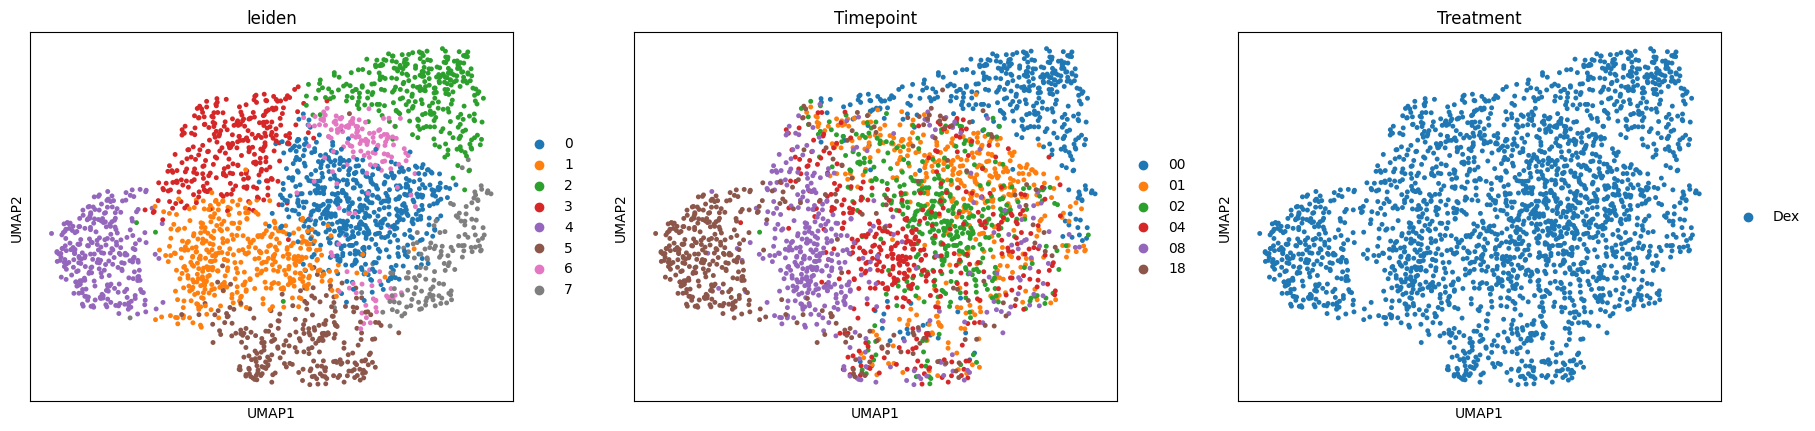

In [15]:
sc.pp.neighbors(adata, n_pcs = 30)
sc.tl.umap(adata)
sc.tl.leiden(adata, resolution = 0.5)
sc.pl.umap(adata, color=['leiden', 'Timepoint', 'Treatment'])

# scVI Base

In [16]:
scvi.model.SCVI.setup_anndata(adata, layer = "counts",
                             continuous_covariate_keys=['pct_counts_mt', 'total_counts', 'pct_counts_ribo'])
model = scvi.model.SCVI(adata)
model.train()

/usr/lib/python3.10/abc.py:119: FutureWarning: SparseDataset is deprecated and will be removed in late 2024. It has been replaced by the public classes CSRDataset and CSCDataset.

For instance checks, use `isinstance(X, (anndata.experimental.CSRDataset, anndata.experimental.CSCDataset))` instead.

For creation, use `anndata.experimental.sparse_dataset(X)` instead.

  return _abc_instancecheck(cls, instance)
An NVIDIA GPU may be present on this machine, but a CUDA-enabled jaxlib is not installed. Falling back to cpu.


/home/formanj/scRNAseq_model/UpDownProject/.venv/lib/python3.10/site-packages/scvi/data/fields/_base_field.py:64: UserWarning: adata.layers[counts] does not contain unnormalized count data. Are you sure this is what you want?
  self.validate_field(adata)
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
You are using a CUDA device ('NVIDIA GeForce RTX 4060 Laptop GPU') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 1/400:   0%|          | 0/400 [00:00<?, ?it/s]

/usr/lib/python3.10/abc.py:119: FutureWarning: SparseDataset is deprecated and will be removed in late 2024. It has been replaced by the public classes CSRDataset and CSCDataset.

For instance checks, use `isinstance(X, (anndata.experimental.CSRDataset, anndata.experimental.CSCDataset))` instead.

For creation, use `anndata.experimental.sparse_dataset(X)` instead.

  return _abc_instancecheck(cls, instance)
/home/formanj/scRNAseq_model/UpDownProject/.venv/lib/python3.10/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 2/400:   0%|          | 1/400 [00:00<06:08,  1.08it/s, v_num=1, train_loss_step=2.87e+3, train_loss_epoch=3.23e+3]

/home/formanj/scRNAseq_model/UpDownProject/.venv/lib/python3.10/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)
/home/formanj/scRNAseq_model/UpDownProject/.venv/lib/python3.10/site-packages/scvi/module/_vae.py:477: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs["px"].log_prob(x).sum(-1)


Epoch 400/400: 100%|██████████| 400/400 [01:51<00:00,  3.31it/s, v_num=1, train_loss_step=1.62e+3, train_loss_epoch=1.62e+3]

`Trainer.fit` stopped: `max_epochs=400` reached.


Epoch 400/400: 100%|██████████| 400/400 [01:51<00:00,  3.59it/s, v_num=1, train_loss_step=1.62e+3, train_loss_epoch=1.62e+3]


scVI latent space

/home/formanj/scRNAseq_model/UpDownProject/.venv/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/formanj/scRNAseq_model/UpDownProject/.venv/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/formanj/scRNAseq_model/UpDownProject/.venv/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warn

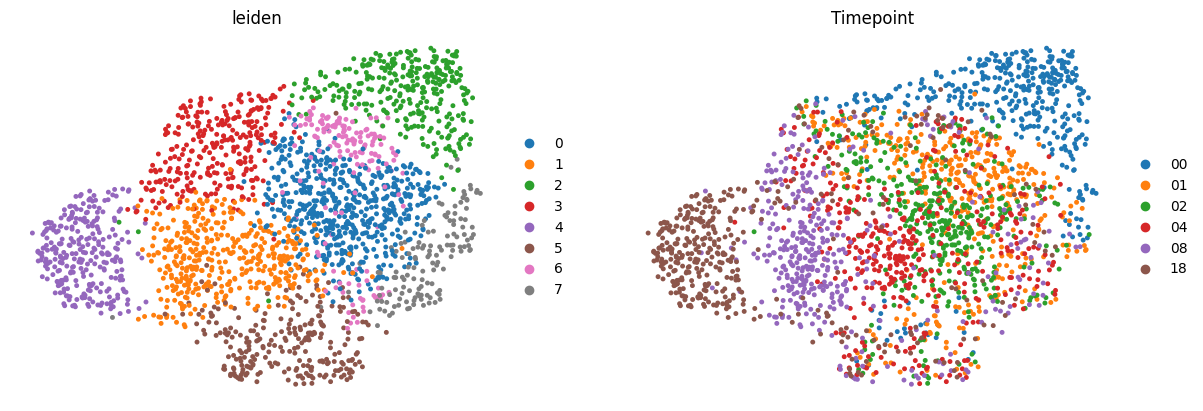

In [17]:
adata.obsm['X_scVI'] = model.get_latent_representation()
adata.layers['scvi_normalized'] = model.get_normalized_expression(library_size = 1e4)
sc.tl.umap(adata)
sc.tl.leiden(adata, resolution = 0.5)
sc.pl.umap(adata, color = ['leiden', 'Timepoint'], frameon = False)

In [18]:
adata.write_h5ad('scvi.h5ad')

# Differential expression

Rest vs Timepoint

In [19]:
markers_scvi = model.differential_expression(groupby = 'Timepoint')
markers_scvi

DE...: 100%|██████████| 6/6 [00:10<00:00,  1.67s/it]


,proba_de,proba_not_de,bayes_factor,scale1,scale2,pseudocounts,delta,lfc_mean,lfc_median,lfc_std,...,raw_mean1,raw_mean2,non_zeros_proportion1,non_zeros_proportion2,raw_normalized_mean1,raw_normalized_mean2,is_de_fdr_0.05,comparison,group1,group2
PHACTR3,0.9782,0.0218,3.803804,2.664546e-06,0.000071,0.0,0.25,-4.091413,-4.240626,2.603035,...,0.000000,0.063098,0.0000,0.1495,0.000000,0.578051,True,00 vs Rest,00,Rest
AC087045.3,0.9726,0.0274,3.569430,3.021210e-07,0.000007,0.0,0.25,-3.646219,-3.732681,3.462932,...,0.000000,0.006090,0.0000,0.0165,0.000000,0.058534,True,00 vs Rest,00,Rest
PCBP3,0.9714,0.0286,3.525331,3.791019e-07,0.000013,0.0,0.25,-4.109720,-4.113389,2.896920,...,0.000000,0.005920,0.0000,0.0190,0.000000,0.052972,True,00 vs Rest,00,Rest
AC073094.1,0.9710,0.0290,3.511030,3.920427e-07,0.000014,0.0,0.25,-4.187129,-4.288507,2.801792,...,0.000497,0.011144,0.0025,0.0325,0.004935,0.102151,True,00 vs Rest,00,Rest
IP6K3,0.9706,0.0294,3.496919,6.676056e-07,0.000019,0.0,0.25,-4.060971,-4.143877,2.624546,...,0.000000,0.024162,0.0000,0.0685,0.000000,0.214588,True,00 vs Rest,00,Rest
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTC39A,0.3102,0.6898,-0.799184,4.490248e-04,0.000436,0.0,0.25,0.048140,0.048441,0.240587,...,0.468918,0.437214,0.8025,0.7470,4.356431,4.183119,False,18 vs Rest,18,Rest
KCNK2,0.2994,0.7006,-0.850157,1.555113e-03,0.001560,0.0,0.25,-0.006957,-0.004194,0.253587,...,1.669956,1.579364,0.9900,0.9855,15.648977,15.217222,False,18 vs Rest,18,Rest
SIAH2,0.2940,0.7060,-0.876035,8.545409e-04,0.000863,0.0,0.25,-0.014845,-0.014553,0.241241,...,0.994138,0.916580,0.9575,0.9460,9.261310,8.812810,False,18 vs Rest,18,Rest
TM9SF3,0.2764,0.7236,-0.962390,1.295969e-03,0.001341,0.0,0.25,-0.047590,-0.055436,0.224195,...,1.428848,1.379883,0.9950,0.9870,13.349762,13.249618,False,18 vs Rest,18,Rest


In [20]:
markers_scvi.to_csv('scvi_markers.csv')

['SLC6A3', 'HES1', 'FKBP5', 'CDC37', 'PPRE', 'TXNRD3', 'CYP2C19', 'CES1', 'ENC1', 'SLC6A8', 'IL17B', 'KLK15', 'TNF', 'HSP90AA1', 'CYP2A6', 'VDRE', 'PLK2', 'CYP7A1', 'GSTA3', 'SRC', 'SLC5A3', 'EPHA2', 'p23', 'BAAT', 'FOXO1', 'TGFBR2', 'SLC7A11', 'PRRG4', 'MAFF', 'SMARCA1', 'SLC2A8', 'SLCO2B1', 'SLC27A5', 'PPARA', 'nGRE', 'Transport', 'UGT1A4', 'SERPINB9', 'STOM', 'PPP2R4', 'ABCB4', 'SLC5A1', 'SLC2A14', 'CYP1B1', 'SLC39A9', 'PDGFB', 'SLC39A8', 'PPARGC1A', 'SLC19A2', 'PRDX1', 'SEC14L1', 'LRRC8A', 'NR0B2', 'GSTM5', 'GSTM1', 'SLC6A14', 'TGFB1', 'HMOX1', 'Other', 'DNER', 'SREBF1', 'ABHD2', 'LXRE', 'CYP1A1', 'GSTM2', 'SLC39A7', 'CAP2', 'GGT1', 'CCL20', 'GSR', 'PRDX6', 'NRIP1', 'Genes', 'GSTM3', 'SLC6A11', 'NQO1', 'UGT1A3', 'ABCB1', 'CYP4F12', 'APOC3', 'SLC39A11', 'SERTAD2', 'SLC39A13', 'FABP1', 'TXN', 'UGT1A6', 'DNAJB1', 'KAT2B', 'ERE', 'XRE', 'BLVRB', 'PTGES3', 'FGFBP1', 'FGF19', 'JUNB', 'SLC27A1', 'ARE', 'SLC2A10', 'EGFR', 'MT1IP', 'PMP2', 'Unknown', 'G6PD', 'S100P', 'NR3C1', 'CES5A', 'GSTT

DE for tp vs tp

In [21]:
t2t = []
for t1 in adata.obs.Timepoint.cat.categories:
    for t2 in adata.obs.Timepoint.cat.categories:
        if t1 != t2:
            markers_scvi = model.differential_expression(groupby = 'Timepoint', group1 = t1, group2 = t2)
            t2t.append(markers_scvi)

DE...: 100%|██████████| 1/1 [00:01<00:00,  1.11s/it]


In [22]:
df = pd.concat(t2t)


In [23]:
df_comparison = pd.DataFrame(columns=list(set(df['comparison'])) ,index=list(set(df.index)))
for i in set(df.index):
    for j in set(df['comparison']):
        if int(j[:2]) < int(j[-2:]):
            possible_rows = df[(df.index == i) & (df['comparison'] == j)]
            #print(possible_rows['lfc_mean'])
            df_comparison.loc[i, j]= possible_rows['lfc_mean'].values[0]
df_comparison.dropna(axis=1, how='all', inplace=True)

In [ ]:
df.to_csv('differential_expression.csv')
df_comparison.to_csv('differential_expression_comparison.csv')

UMAP of genes

In [ ]:
import umap

reducer = umap.UMAP(n_neighbors=30,
    min_dist=0.0,
    n_components=2)

embedding = reducer.fit_transform(df_comparison[:].to_numpy())

Text(0.5, 1.0, 'UMAP projection of the Log Fold Changes dataset')

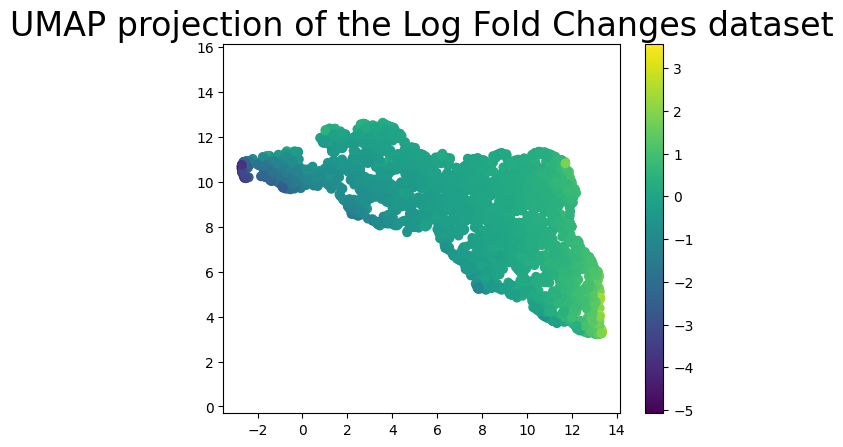

In [ ]:
plt.scatter(
    embedding[:, 0],
    embedding[:, 1],
    c = df_comparison.loc[:, '00 vs 04'])
plt.colorbar()
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection of the Log Fold Changes dataset', fontsize=24)